In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src import rotation

def test(L,J0,dt,N,dumpFreq):
    qlsim=np.array([1,0,0,0])
    qrsim=np.array([1,0,0,0])
    qls=[qlsim]
    qrs=[qrsim]
    ts=[0]
    tsim=0
    
    for i in range(N):
        qlsim,qrsim=rotation.step(qlsim,qrsim,L,J0,dt)
        tsim+=dt
        if(i%dumpFreq==0):
            qls.append(qlsim)
            qrs.append(qrsim)
            ts.append(tsim)
            print(str(i)+'/'+str(N)+'\r',end='')
    qls=np.array(qls)   
    qrs=np.array(qrs)
    ts=np.array(ts)
    Rs=[rotation.getR(qls[i],qrs[i]) for i in range(len(qls))]
    KEs=[rotation.getKE(qls[i],qrs[i],L,J0) for i in range(len(qls))]
    Omegas=[rotation.solveOmega(qls[i],qrs[i],L,J0) for i in range(len(qls))]
    Rs=np.array(Rs)
    KEs=np.array(KEs)
    Omegas=np.array(Omegas)
    return ts,qls,qrs,Rs,KEs,Omegas

## A constant rotation of a 4D sphere

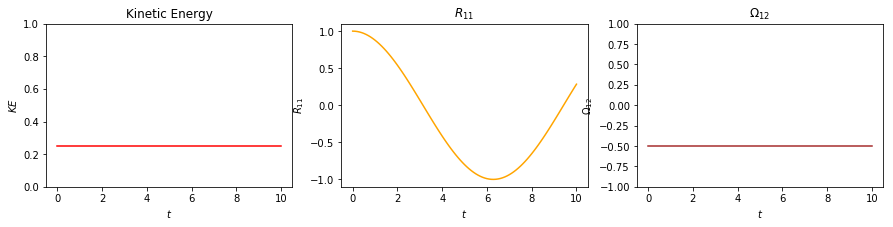

In [12]:
# test parameters
J0 = np.diag([1,1,1,1]) # principal 2nd moments
L = np.array([[0,1,0,0],
              [0,0,0,0],
              [0,0,0,0],
              [0,0,0,0]])# Angular momentum, specify the upper triangle
L = L-L.T # completes the lower half
# run test
ts,qls,qrs,Rs,KEs,Omegas=test(L,J0,dt=0.1,N=100,dumpFreq=1)

fig = plt.figure(figsize=(15,3))
ax=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

ax.set_title('Kinetic Energy')
ax.set_xlabel('$t$')
ax.set_ylabel('$KE$')
ax.set_ylim(bottom=0,top=1)
ax.plot(ts,KEs,c='red')

ax2.set_title('$R_{11}$')
ax2.set_xlabel('$t$')
ax2.set_ylabel('$R_{11}$')
#ax2.set_ylim(bottom=-1,top=1)
ax2.plot(ts,Rs[:,0,0],c='orange')

ax3.set_title('$\Omega_{12}$')
ax3.set_xlabel('$t$')
ax3.set_ylabel('$\Omega_{12}$')
ax3.set_ylim(bottom=-1,top=1)
ax3.plot(ts,Omegas[:,0,1],c='brown')

In [15]:
print(Omegas[10])
print(Rs[10])
print(KEs[10])

[[ 0.  -0.5  0.   0. ]
 [ 0.5  0.   0.   0. ]
 [-0.  -0.   0.   0. ]
 [-0.  -0.  -0.   0. ]]
[[ 0.87755758 -0.47947126  0.          0.        ]
 [ 0.47947126  0.87755758  0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]
0.24999999999999994


As seen above, only the xy moments should matter. We can collapse the zw dimensions onto the xy plane. We would have a 2D disk with non-uniform density $\rho(r)$. In 2D, the only moment of inertia is
$$I=\sum_{\alpha}m_{\alpha}r_{\alpha}^2=\sum_{\alpha}m_{\alpha}x_{\alpha}^2+\sum_{\alpha}m_{\alpha}y_{\alpha}^2=J_{xx}+J_{yy}$$
In this case we have $J_{xx}=J_{yy}=1$. So $I=2$.
In 2D we also have $L=I\omega$ and $T=\frac{1}{2}I\omega^2$. Therefore
$$\omega=\frac{L}{I}=\frac{1}{2}$$
$$T=\frac{1}{2}\cdot2\cdot\left(\frac{1}{2}\right)^2=\frac{1}{4}$$
Period of rotation is
$$P=\frac{2\pi}{\omega}=4\pi$$
In plot for $R_{11}$ we see a it traverses half an oscillation in $t=2\pi$. All check.

## A general rotation, with three different timesteps

In [2]:
# test parameters
J0 = np.diag([1,2,3,4]) # principal 2nd moments
L = np.array([[0,1,20,3],
              [0,0,10,10],
              [0,0,0,1],
              [0,0,0,0]])# Angular momentum, specify the upper triangle
L = L-L.T # completes the lower half
# run test
ts,qls,qrs,Rs,KEs,Omegas=test(L,J0,dt=0.1,N=100,dumpFreq=1)
ts2,qls2,qrs2,Rs2,KEs2,Omegas2=test(L,J0,dt=0.005,N=2000,dumpFreq=20)
ts3,qls3,qrs3,Rs3,KEs3,Omegas3=test(L,J0,dt=0.0001,N=100000,dumpFreq=1000)

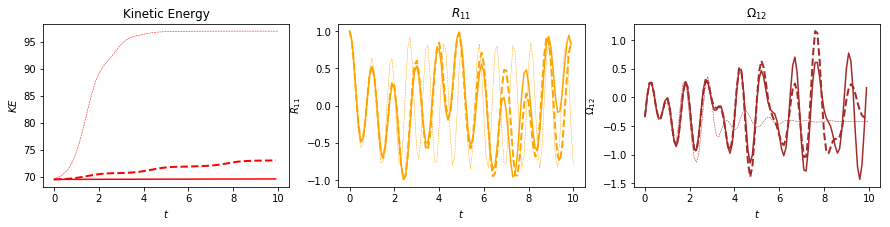

In [3]:
fig = plt.figure(figsize=(15,3))
ax=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

ax.set_title('Kinetic Energy')
ax.set_xlabel('$t$')
ax.set_ylabel('$KE$')
#ax.set_ylim(bottom=65,top=90)
ax.plot(ts,KEs,'--',linewidth=0.5,c='red')
ax.plot(ts2,KEs2,'--',linewidth=2,c='red')
ax.plot(ts3,KEs3,c='red')

ax2.set_title('$R_{11}$')
ax2.set_xlabel('$t$')
ax2.set_ylabel('$R_{11}$')
#ax2.set_ylim(bottom=-1,top=1)
ax2.plot(ts,Rs[:,0,0],'--',linewidth=0.5,c='orange')
ax2.plot(ts2,Rs2[:,0,0],'--',linewidth=2,c='orange')
ax2.plot(ts3,Rs3[:,0,0],c='orange')

ax3.set_title('$\Omega_{12}$')
ax3.set_xlabel('$t$')
ax3.set_ylabel('$\Omega_{12}$')
#ax3.set_ylim(bottom=-1,top=1)
ax3.plot(ts,Omegas[:,0,1],'--',linewidth=0.5,c='brown')
ax3.plot(ts2,Omegas2[:,0,1],'--',linewidth=2,c='brown')
ax3.plot(ts3,Omegas3[:,0,1],c='brown')

Thin dotted line: dt=0.1, dashed line: dt=0.005, solid line: dt=0.0001. The energy stability is very poor, which requires extra timesteps to ensure sufficient accuracy. The energy error also increases monotonically. Overall this is a poor algorithm.